# Glass_Identification :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create new classes of transformations
from sklearn.base import TransformerMixin

#preprocessing
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)

# dimensionality reduction
from sklearn.decomposition import PCA

#data transform
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox

# data transform

from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold,
                                    cross_val_score, GridSearchCV, learning_curve, validation_curve)

In [3]:
# model selection modules
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# streaming pipelines
from sklearn.pipeline import Pipeline

# to create a boxcox transformation class
from sklearn.base import BaseEstimator, TransformerMixin

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [4]:
url =("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")
data = pd.read_csv(url, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Exploring Dataset

In [5]:
# calculating null values
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [6]:
# shape of data
data.shape

(214, 11)

In [7]:
data[10].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [8]:
# checking Data type of columns
data.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

In [9]:
# Counting Number of values Belonging to each class
data[10].value_counts()

10
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

The occurences of types 1 and 2 constitute more than 67% of the glass types.

# Data Preprocessing

Attribute Information:-

   1.RI: refractive index
   
   2.Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   
   3.Mg: Magnesium
   
   4.Al: Aluminum
   
   5.Si: Silicon
   
   6.K: Potassium
   
   7.Ca: Calcium
   
   8.Ba: Barium
  
   9.Fe: Iron
  
   10.Type of glass: (class attribute)
     
    	1- building_windows_float_processed
    	2- building_windows_non_float_processed
    	3- vehicle_windows_float_processed
    	4- vehicle_windows_non_float_processed (none in this database)
    	5- containers
    	6- tableware
    	7- headlamps


# 1. Adding meaningful column/attribute names

In [10]:
names = ['Id','Ri','Na','Mg','Al','Si','k','Ca','Ba','Fe','glass_type']
data.columns=names
data.head()

,Id,Ri,Na,Mg,Al,Si,k,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 2. Removing unnecessary columns

In [11]:
data = data.drop(['Id'],axis=1)

In [12]:
data.head()

,Ri,Na,Mg,Al,Si,k,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Statistics of Dataset

In [13]:
data.describe()

,Ri,Na,Mg,Al,Si,k,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Above Statistics shows that data is across all attributes is not in same range, so we will have to normalize the data first

# Data visualization

In [14]:
features = ['Ri','Na','Mg','Al','Si','k','Ca','Ba','Fe']
label = ['glass_type']

x = data[features]
y = data[label]

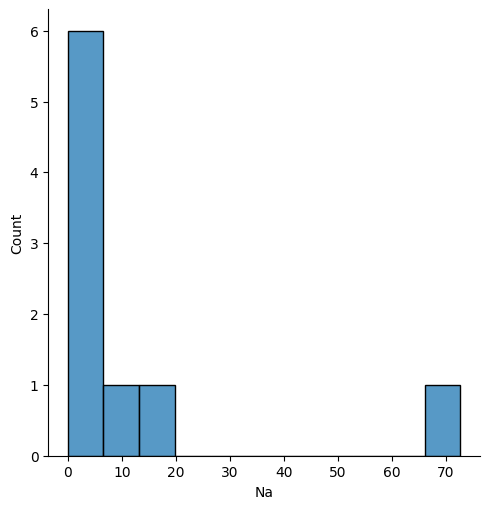

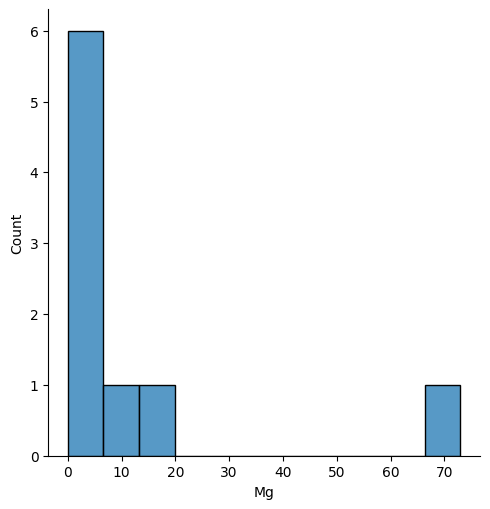

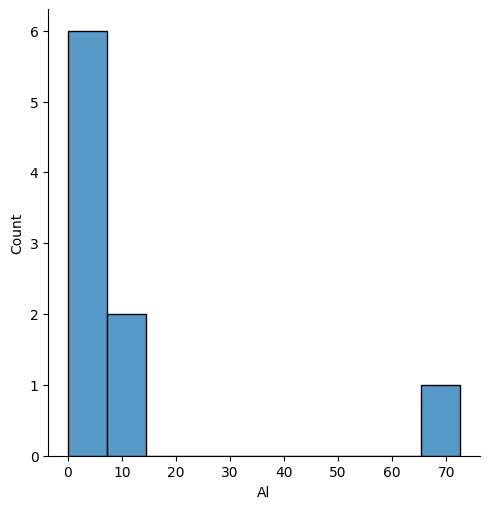

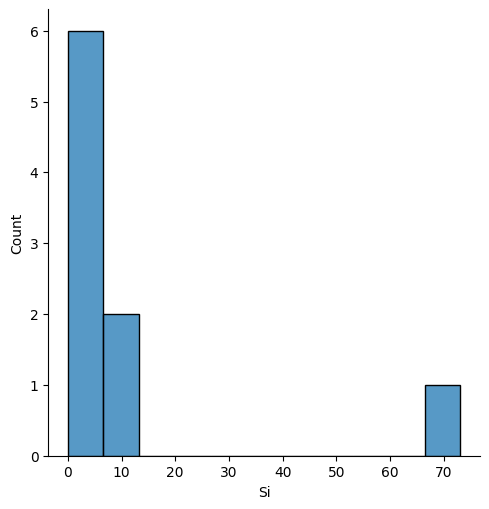

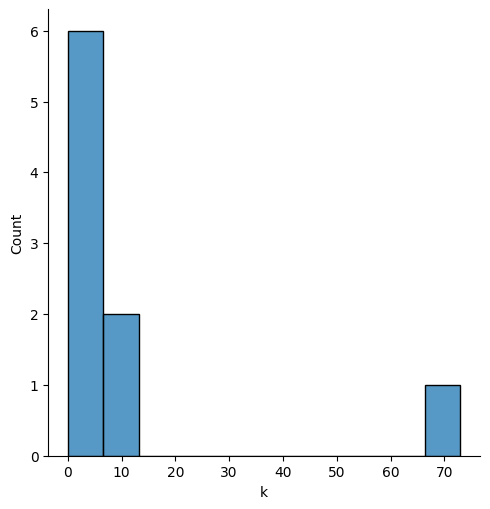

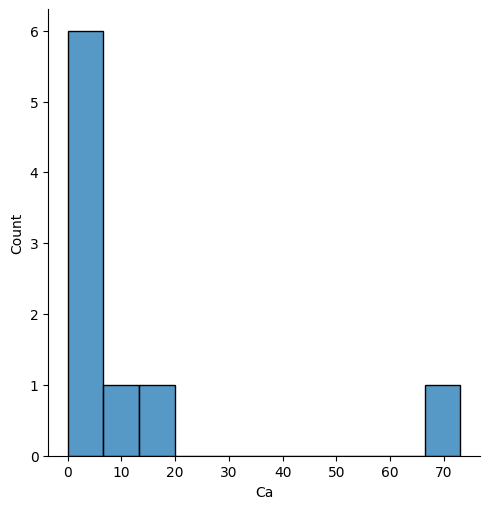

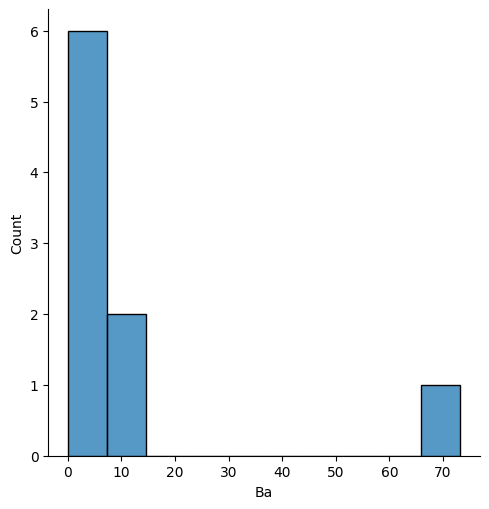

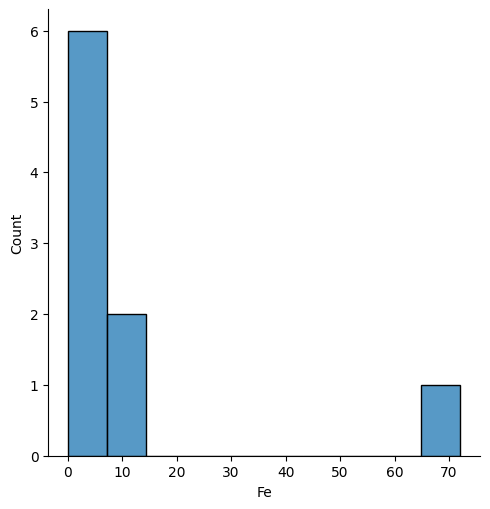

In [15]:
x2 = x.values

for i in range(1,9):
    sns.displot(x2[i])
    plt.xlabel(features[i])
    plt.show()

1. Our dataset is skewed either on positive side or negative side and is not normalized

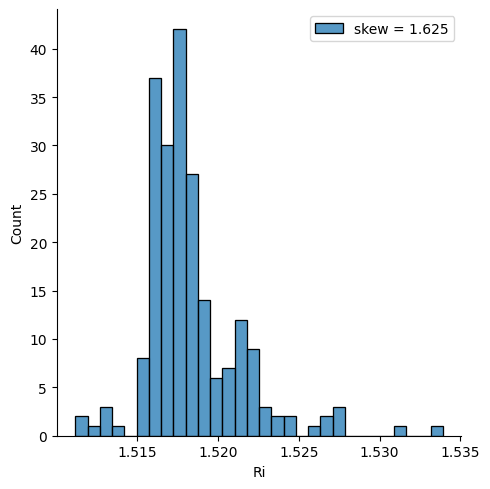

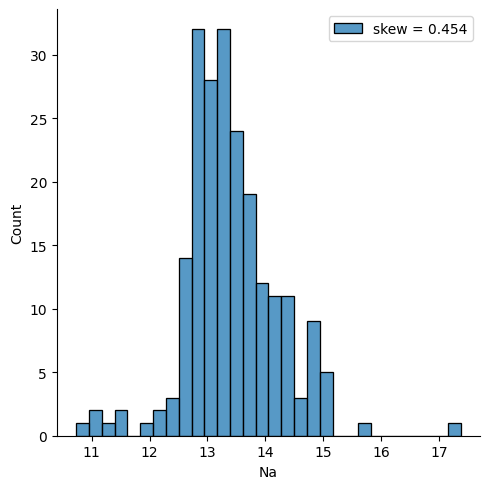

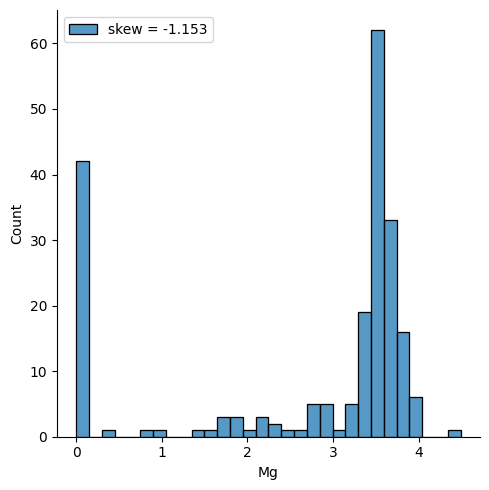

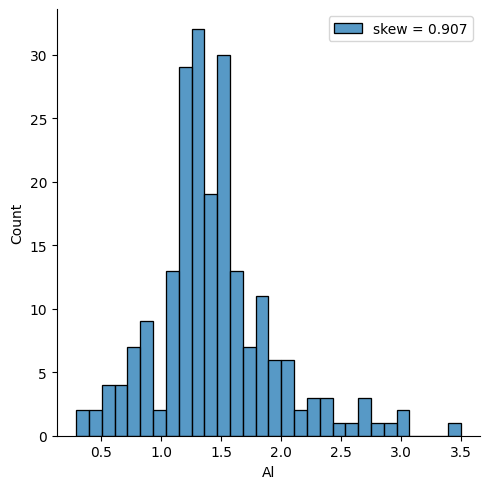

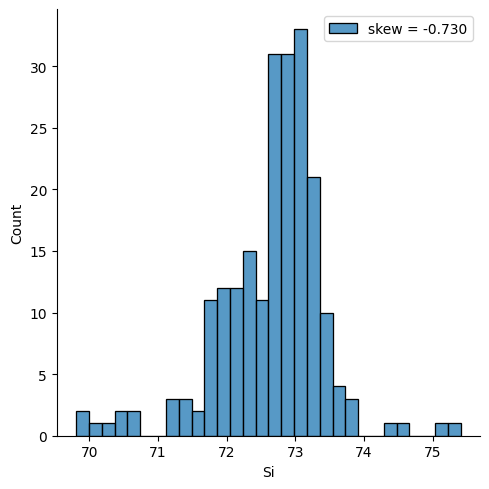

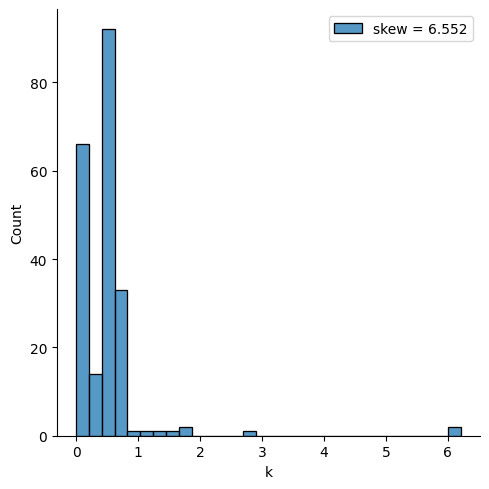

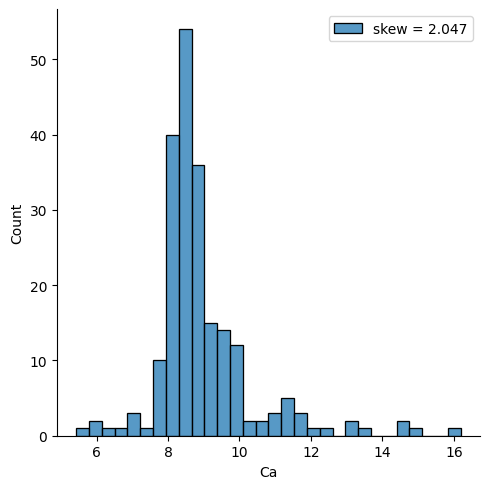

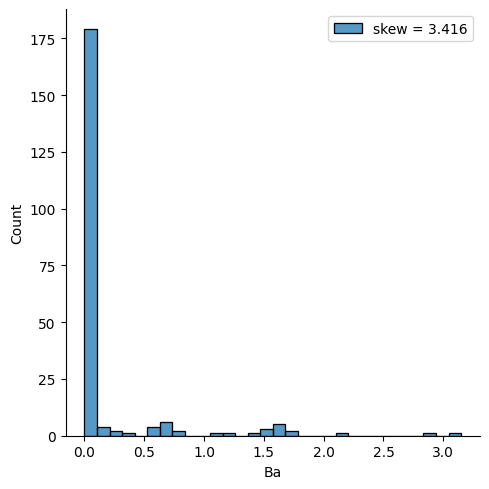

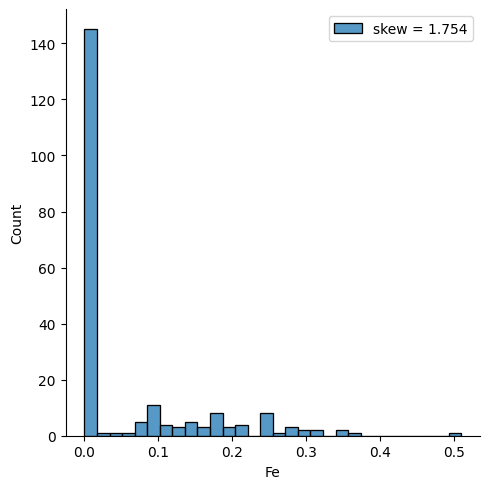

In [16]:
# trying to gain more insights about the data
for feat in features:
    skew = data[feat].skew()
    sns.displot(data[feat], kde = False, label='skew = %.3f'%(skew),bins=30)
    plt.legend(loc='best')
    plt.show()

Outcomes:

    1) The distribution of potassium (K) and Barium (Ba) seem to contain many outlier.
    
    2) The features Fe,Ba,Ca and K are highly Skewed(They have High skew coefficients.)
    
    3) None of the features follow Normal Distribution (are not normally distributed.)

# Using Multivariate plots

<Figure size 500x500 with 0 Axes>

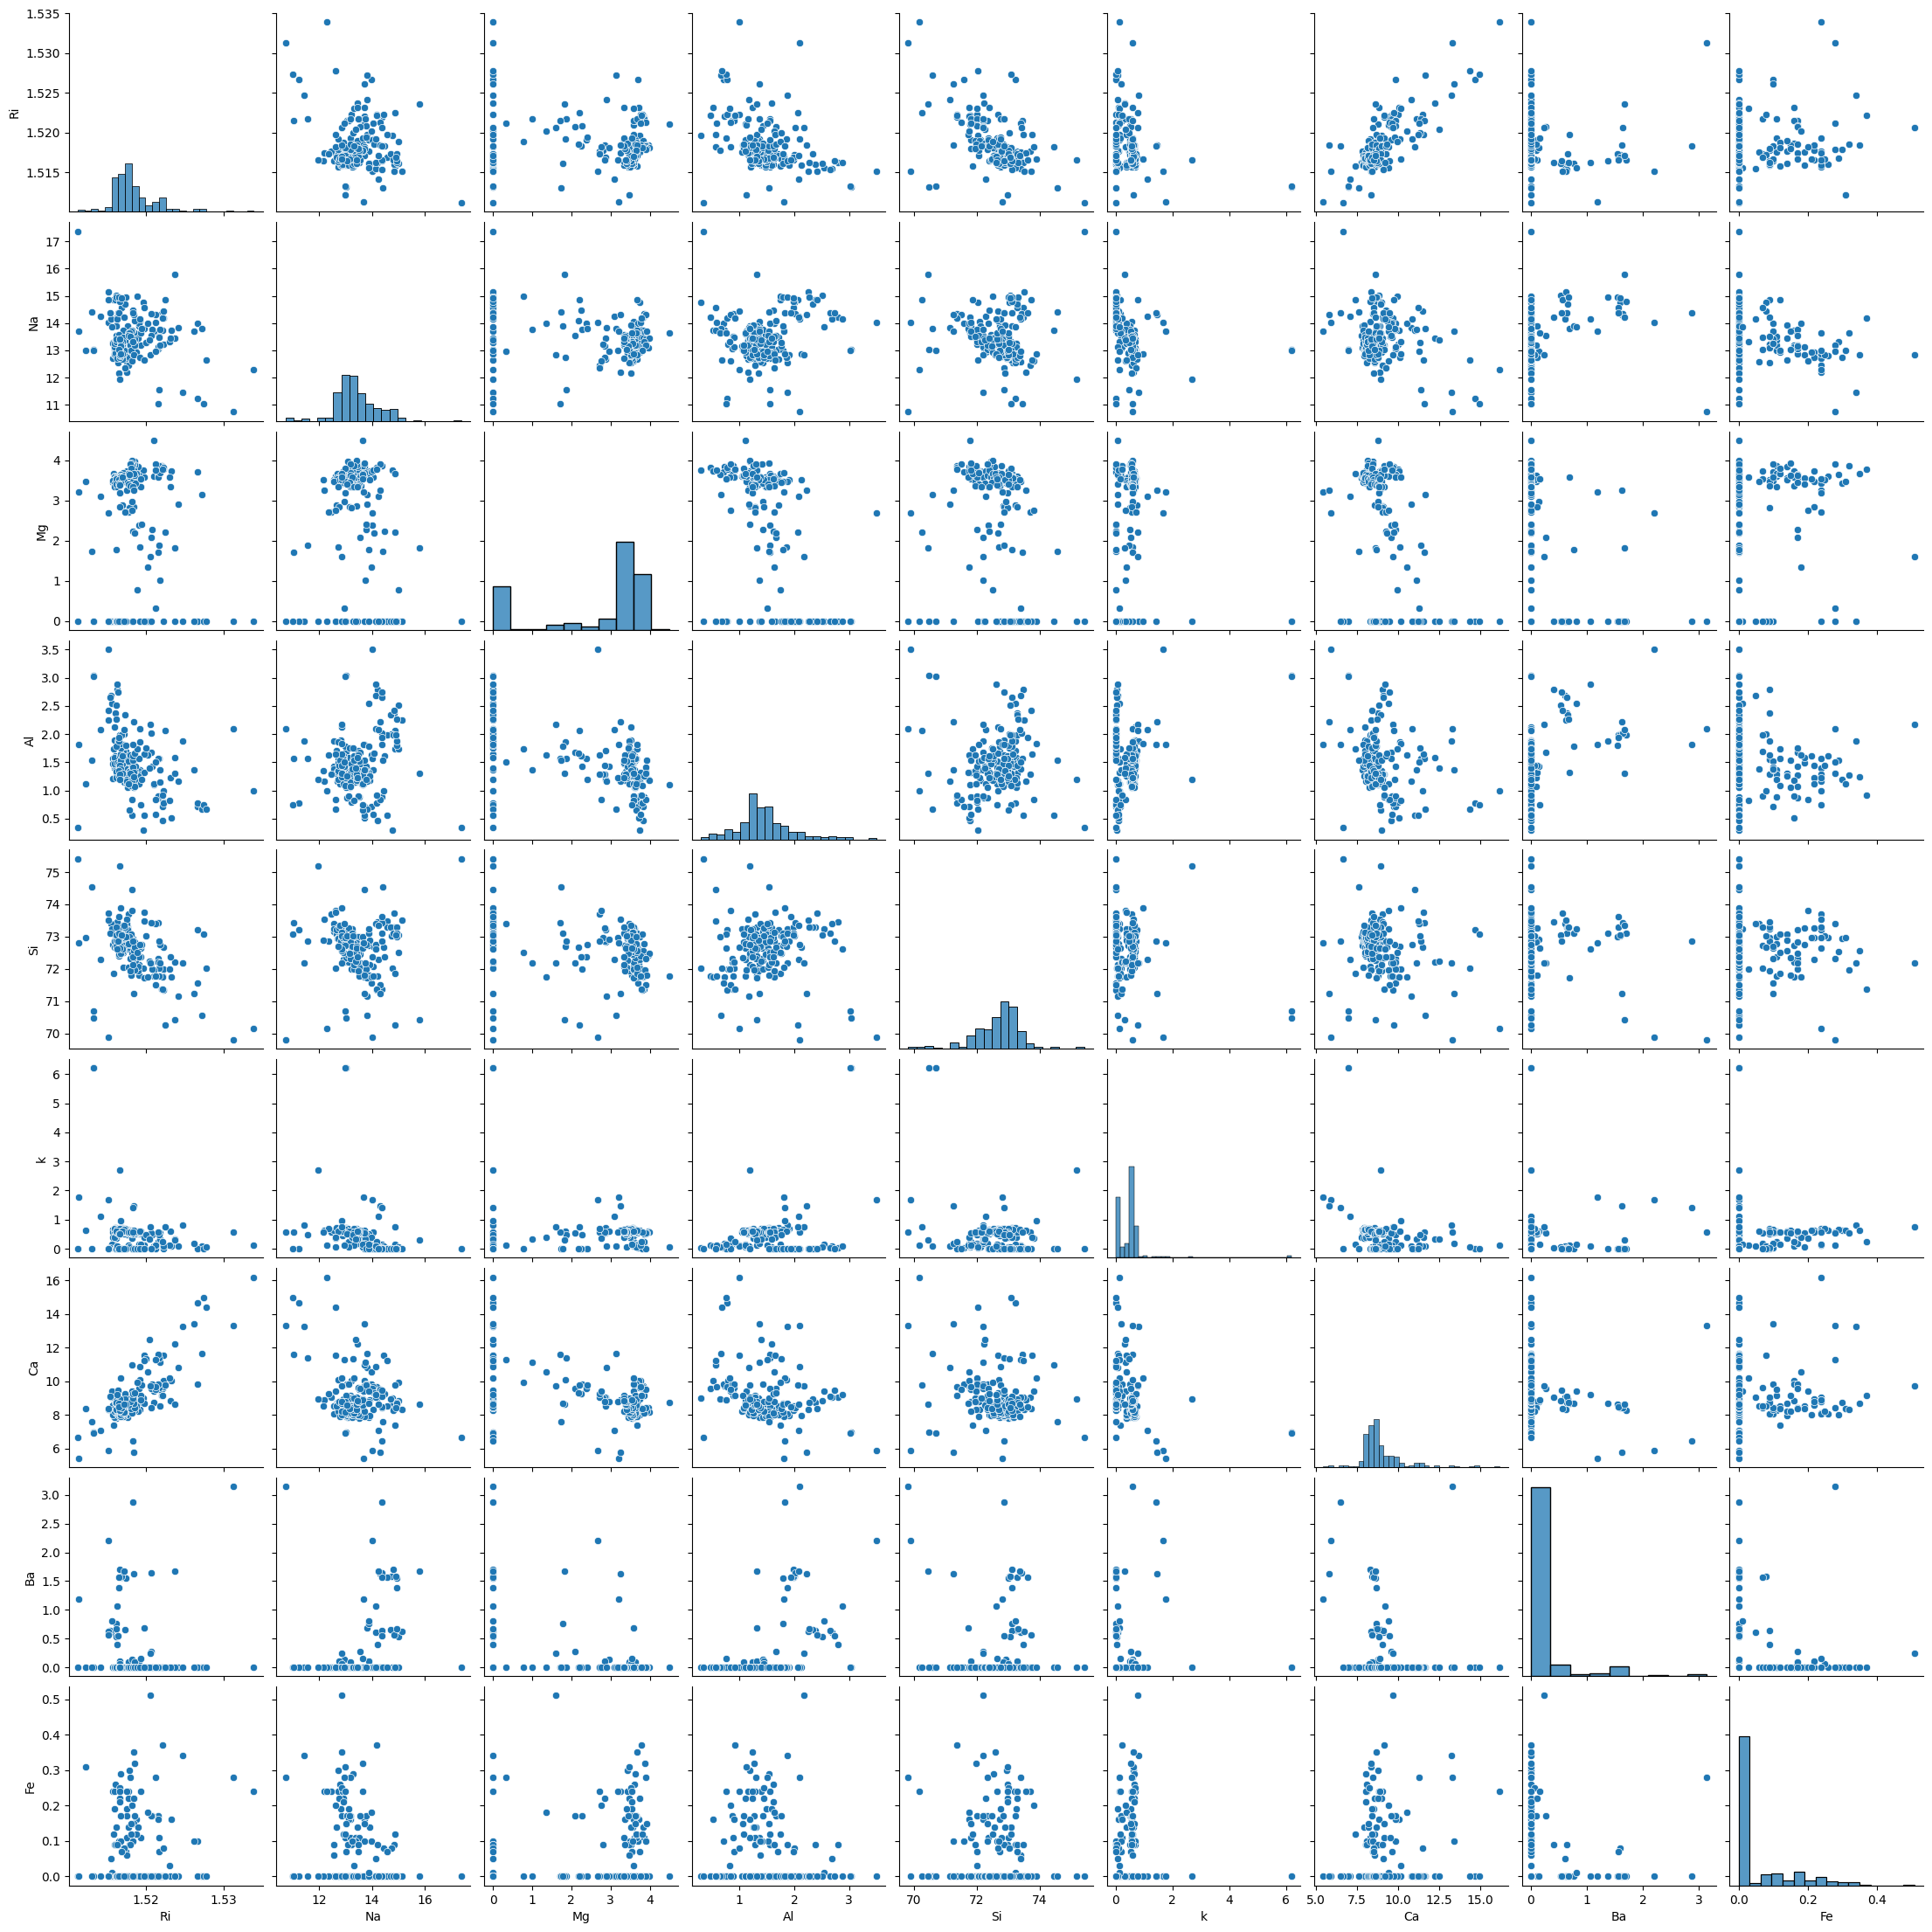

In [33]:
x2 = pd.DataFrame(x)
plt.figure(figsize=(5,5))
sns.pairplot(data=x2)
plt.show()

# Using Correlation Matrix

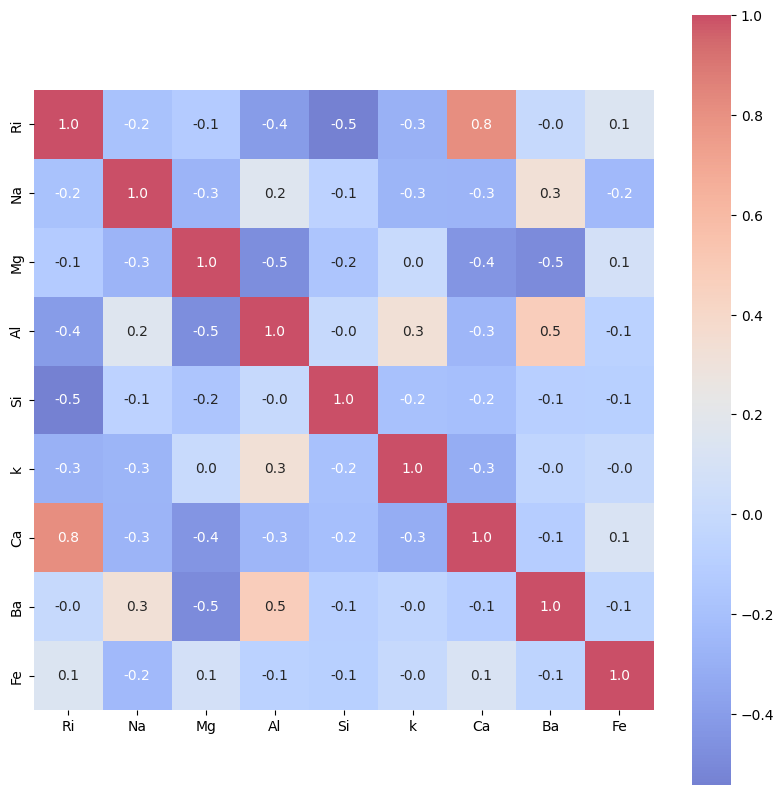

In [18]:
corelation = x.corr()
plt.figure(figsize= (10,10))
sns.heatmap(corelation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':10},xticklabels=features,yticklabels=features,alpha=0.7,cmap='coolwarm')
plt.show()

Outcomes

1) AI and Ba have intermediate correlation between each other.
2) RI and Ca have strong correlation between each other.

# Outlier Detection

In [19]:
# Detect observations with more than one outlier
def outlier_hunt(data):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []
    
    for col in data.columns.tolist():
        Q1 = np.percentile(data[col],25)
        
        Q3 = np.percentile(data[col],75)
        
        IQR = Q3-Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = data[(data[col]<Q1 - outlier_step) | (data[col]>Q3+outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data[features]))))

The dataset contains 14 observations with more than 2 outliers


Outcome :

1. In our data, there exists around 14 observations with  multiple outliers.
2. These could harm the efficiency of our learning algorithms.We'll remove them now.

# Data Treatment

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ri          214 non-null    float64
 1   Na          214 non-null    float64
 2   Mg          214 non-null    float64
 3   Al          214 non-null    float64
 4   Si          214 non-null    float64
 5   k           214 non-null    float64
 6   Ca          214 non-null    float64
 7   Ba          214 non-null    float64
 8   Fe          214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# 1.Removing Oultliers

In [21]:
outlier_indices = outlier_hunt(data[features])
df = data.drop(outlier_indices).reset_index(drop=True)
print(data.shape)

(214, 10)


Outcome:
1. Removing observations with multiple outliers(more than 2) left us with 200 observations to train from.

# 2. Normalizing The Data

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
x.head()

,Ri,Na,Mg,Al,Si,k,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [24]:
y.head()

,glass_type
0,1
1,1
2,1
3,1
4,1


# 3. Scaling The Features

In [25]:
from sklearn import preprocessing
X = preprocessing.scale(x)


# Visualization of Data after Being Preprocessed

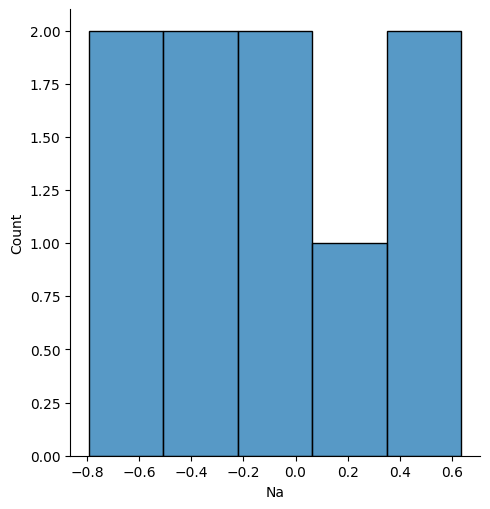

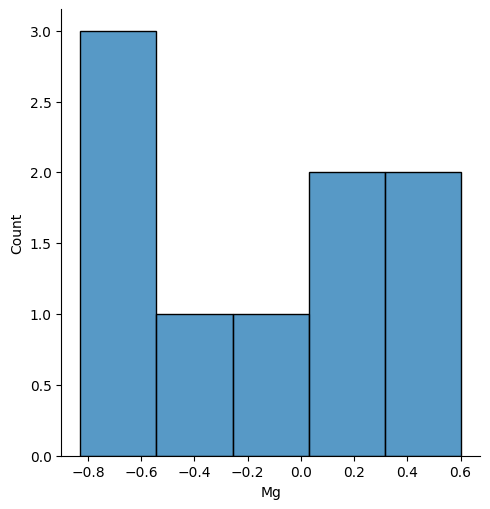

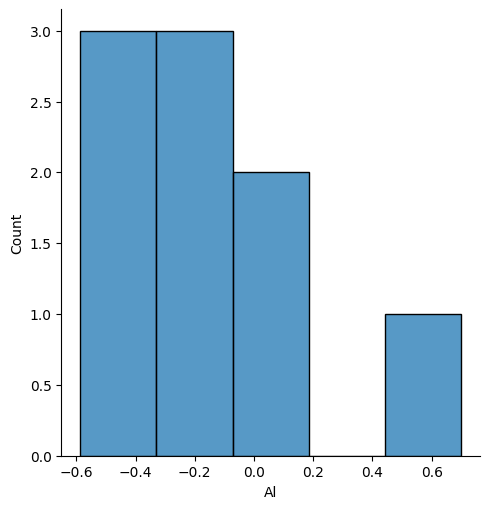

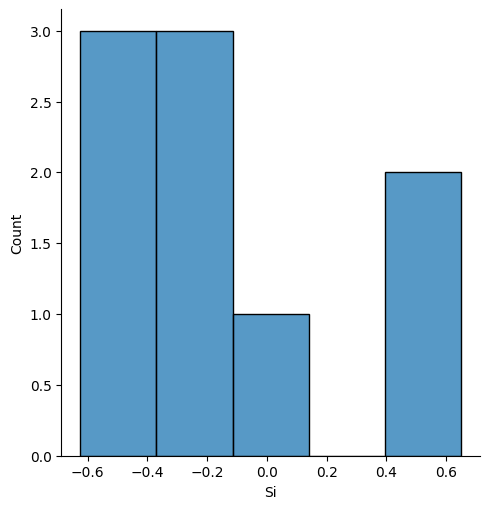

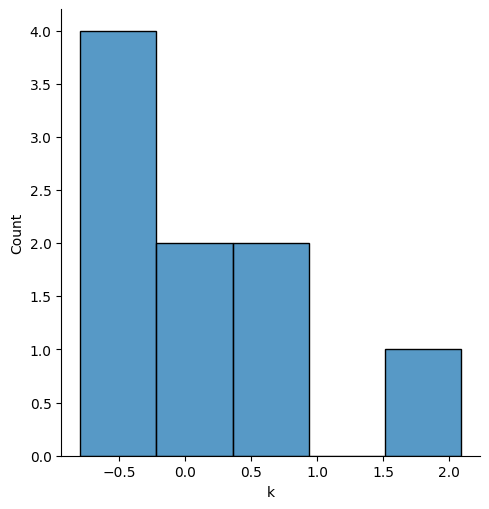

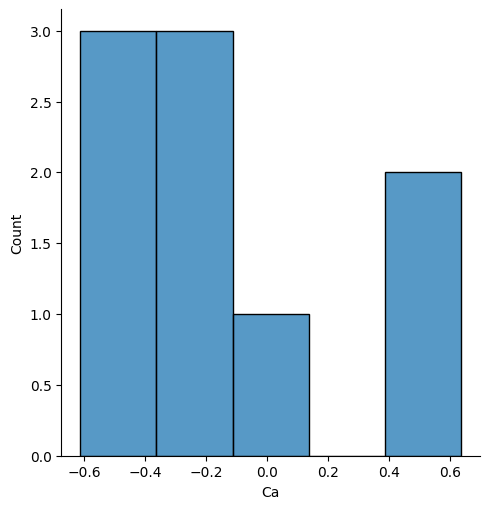

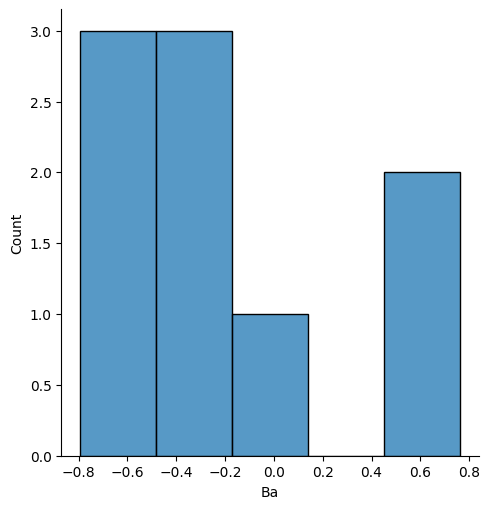

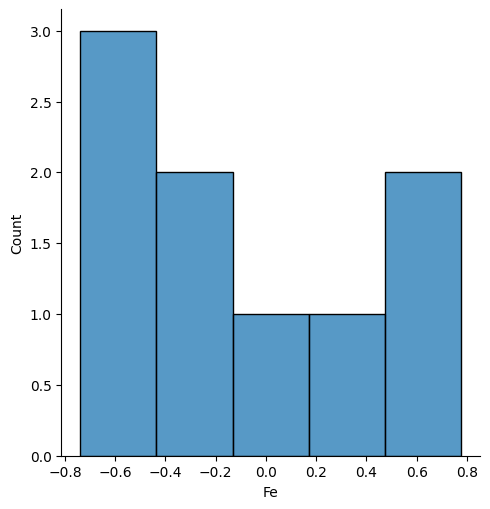

In [26]:
x2 = X
for i in range(1,9):
    sns.displot(x2[i])
    plt.xlabel(features[i])
    plt.show()

Outcomes:
1. skewness is reduced.
2. Data is more normalized.

# Training set - Test set Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0,stratify=y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print('Shape of x_train =' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of x_train =(160, 9)
Shape of X_test = (54, 9)
Shape of y_train = (160,)
Shape of y_test = (54,)


# Training Different Machine Learning Models

# 1. K-Nearest Neighbors

In [28]:
Scoresknn = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score = knn.score(X_test, y_test)
    Scoresknn.append(score)
print(knn.score(X_train, y_train))
print(Scoresknn)

0.65625
[0.6666666666666666, 0.6296296296296297, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.7222222222222222, 0.7407407407407407, 0.7222222222222222, 0.7407407407407407]


# 2. Decision Tree

In [29]:
Scorestree = []

for i in range (1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train,y_train)
    score = tree.score(X_test, y_test)
    Scorestree.append(score)
print(tree.score(X_train, y_train))
print(Scorestree)

1.0
[0.7037037037037037]


# 3. Logistic Regression

In [30]:
Scoreslog = []

for i in range (1):
    log = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    log.fit(X_train,y_train)
    score = log.score(X_test, y_test)
    Scoreslog.append(score)
print(log.score(X_train, y_train))
print(Scoreslog)

0.65
[0.6296296296296297]


# 4. SVM Classifier (Non-Linear)

In [31]:
Scoressvm = []

for i in range (1):
    svc = SVC(gamma='auto')
    svc.fit(X_train,y_train)
    score = svc.score(X_test, y_test)
    Scoressvm.append(score)
print(svc.score(X_train, y_train))
print(Scoressvm)

0.76875
[0.7407407407407407]


# Summary

Out of all above models:

1.Decision Tree

   Decision tree is overfitting with:->
  
   Training Accuracy: 1.0
   
   Testing Accuracy: 0.7037037037037037
   
   
   
2.SVM (Non Linear Kernal)

   SVM (Non Linear kernal) is giving best result with:

   Training Accuracy : 0.76875

   Testing Accuracy : 0.7407407407407407

# Saving Model

In [32]:
import joblib
joblib.dump(Scoressvm,"Glass_identification")

['Glass_identification']